In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [4]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [7]:
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [11]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
train['Embarked'].fillna('S',inplace=True)

In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [14]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [15]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [16]:
(177/891)*100

19.865319865319865

In [41]:
train_age=np.random.randint(train['Age'].mean()-train['Age'].std(), train['Age'].mean() + train['Age'].std(),177)

In [42]:
test_age=np.random.randint(test['Age'].mean()-test['Age'].std(), test['Age'].mean() + test['Age'].std(),86)

In [43]:
train['Age'][train['Age'].isnull()]=train_age

C:\Users\OM KHAIRE\AppData\Local\Temp\ipykernel_4784\4268069075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][train['Age'].isnull()]=train_age


In [44]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [45]:
test['Age'][test['Age'].isnull()]=test_age

C:\Users\OM KHAIRE\AppData\Local\Temp\ipykernel_4784\3484201817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][test['Age'].isnull()]=test_age


In [46]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [47]:
#EDA

In [51]:
train[train['Pclass']==3]['Survived'].value_counts()

0    372
1    119
Name: Survived, dtype: int64

In [52]:
train.groupby(['Pclass','Survived']).mean()

C:\Users\OM KHAIRE\AppData\Local\Temp\ipykernel_4784\1438308620.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train.groupby(['Pclass','Survived']).mean()


PassengerId        Age     SibSp     Parch       Fare
Pclass Survived                                                       
1      0          410.300000  40.681250  0.287500  0.300000  64.684007
       1          491.772059  34.984706  0.492647  0.389706  95.608029
2      0          452.123711  33.237113  0.319588  0.144330  19.412328
       1          439.080460  26.158966  0.494253  0.643678  22.055700
3      0          453.580645  27.123656  0.672043  0.384409  13.669364
       1          394.058824  23.301849  0.436975  0.420168  13.694887

In [55]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [56]:
119/(372+119)

0.24236252545824846

In [57]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [58]:
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [59]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

C:\Users\OM KHAIRE\AppData\Local\Temp\ipykernel_4784\3826302481.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==0])
C:\Users\OM KHAIRE\AppData\Local\Temp\ipykernel_4784\3826302481.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived

<Axes: xlabel='Age', ylabel='Density'>

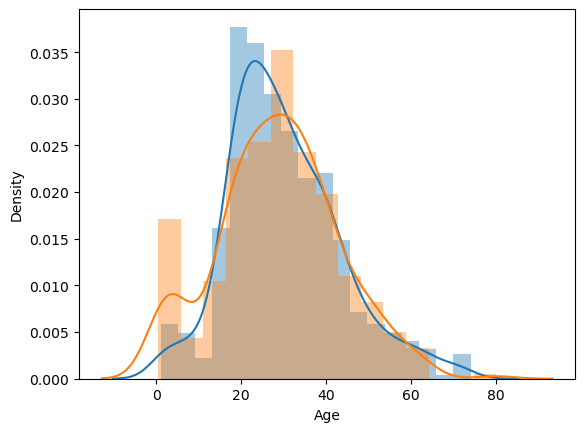

In [62]:
sns.distplot(train['Age'][train['Survived']==0])
sns.distplot(train['Age'][train['Survived']==1])

C:\Users\OM KHAIRE\AppData\Local\Temp\ipykernel_4784\2626582821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][train['Survived']==0])
C:\Users\OM KHAIRE\AppData\Local\Temp\ipykernel_4784\2626582821.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][train['Surviv

<Axes: xlabel='Fare', ylabel='Density'>

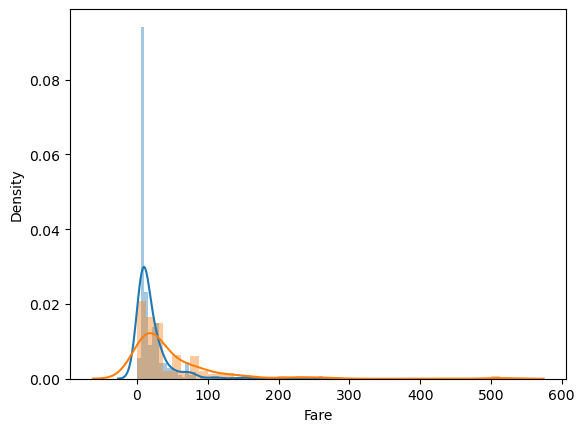

In [63]:
sns.distplot(train['Fare'][train['Survived']==0])
sns.distplot(train['Fare'][train['Survived']==1])

In [64]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [65]:
train.drop(columns=['Ticket'],inplace=True)
test.drop(columns=['Ticket'],inplace=True)

In [70]:
train['Family']=train['SibSp'] + train['Parch'] + 1

In [71]:
train['Family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

In [72]:
test['Family']=test['SibSp'] + test['Parch'] + 1

In [73]:
test['Family'].value_counts()

1     253
2      74
3      57
4      14
5       7
7       4
11      4
6       3
8       2
Name: Family, dtype: int64

In [68]:
train.groupby(['Family'])['Survived'].mean()

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [74]:
def cal(number):
    if number==1:
        return "Alone"
    elif number>1 and number<5:
        return "Medium"
    else:
        return "Large"

In [75]:
train['Family_size']=train['Family'].apply(cal)

In [76]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Medium


In [77]:
test['Family_size']=test['Family'].apply(cal)

In [78]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Family_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,Alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,Medium


In [79]:
train.drop(columns=['SibSp','Parch','Family'],inplace=True)
test.drop(columns=['SibSp','Parch','Family'],inplace=True)

In [80]:
print(train.shape)
print(test.shape)

(891, 9)
(418, 8)


In [81]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Fare           0
Embarked       0
Family_size    0
dtype: int64

In [82]:
passenger_Id=test['PassengerId'].values

In [83]:
train.drop(columns=['Name','PassengerId'],inplace=True)
test.drop(columns=['Name','PassengerId'],inplace=True)

In [84]:
train.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family_size    0
dtype: int64

In [85]:
test.isnull().sum()

Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family_size    0
dtype: int64

In [87]:
train=pd.get_dummies(train, columns=['Pclass','Sex','Embarked','Family_size'],drop_first=True)

In [88]:
train.shape

(891, 10)

In [89]:
test=pd.get_dummies(test, columns=['Pclass','Sex','Embarked','Family_size'],drop_first=True)

In [90]:
test.shape

(418, 9)

In [91]:
X=train.iloc[:,1:].values
y=train.iloc[:,0].values

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [95]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [96]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [97]:
y_pred=classifier.predict(X_test)

In [98]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.770949720670391

In [99]:
Xf=test.iloc[:,:].values

In [100]:
y_final=classifier.predict(Xf)

In [102]:
passenger_Id.shape

(418,)

In [106]:
final=pd.DataFrame()

In [107]:
final

""


In [108]:
final['passengerId']=passenger_Id
final['Survived']=y_final

In [110]:
final.to_csv('Submission.csv',index=False)